In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dummy model and data loader setup for demonstration (replace with your own)
model = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 10))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform: normalize pixel values to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor()
])

# Download and load training set
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Training settings
num_epochs = 5

# Tracking lists
loss_train_list = []
acc_train_list = []

for epoch in range(num_epochs):
    model.train()
    total = 0
    correct = 0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Record loss
        loss_train_list.append(loss.item())

        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Accuracy per epoch
    acc = 100 * correct / total
    acc_train_list.append(acc)
    print(f"Epoch [{epoch+1}/{num_epochs}] Accuracy: {acc:.2f}%")

# Save lists
np.save("loss_train_list.npy", loss_train_list)
np.save("acc_train_list.npy", acc_train_list)


Epoch [1/5] Accuracy: 88.12%
Epoch [2/5] Accuracy: 91.53%
Epoch [3/5] Accuracy: 92.11%
Epoch [4/5] Accuracy: 92.36%
Epoch [5/5] Accuracy: 92.58%


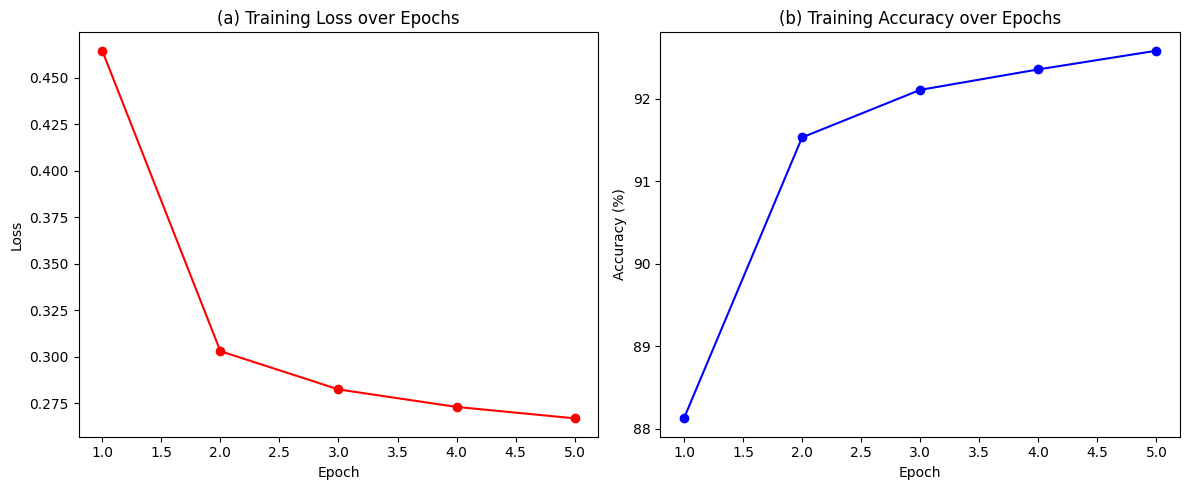

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load saved data
loss_train_list = np.load("loss_train_list.npy")
acc_train_list = np.load("acc_train_list.npy")

# Constants
num_epochs = len(acc_train_list)
steps_per_epoch = len(loss_train_list) // num_epochs

# Average loss per epoch
loss_per_epoch = [
    np.mean(loss_train_list[i * steps_per_epoch:(i + 1) * steps_per_epoch])
    for i in range(num_epochs)
]

epochs = list(range(1, num_epochs + 1))

# Plotting
plt.figure(figsize=(12, 5))

# (a) Loss vs. Epoch
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_per_epoch, color='red', marker='o')
plt.title('(a) Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# (b) Accuracy vs. Epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_train_list, color='blue', marker='o')
plt.title('(b) Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.savefig("training_metrics_epoch_avg.png", dpi=300)
